- investpy 의 거래량 데이터가 부정확하다. (ex) 비정상적으로 낮은 거래량들이 너무 많다.실제로 그럴리 없다
- 거래량 데이터 신뢰성 확보 측면에서 국내 장에 적합한 FinanceDataReader 를 쓰는게 안전하겠다.
- 거래량 이외에 다른 데이터는 문제 없어보인다


- investpy 로 불러오는 일별 데이터는 재개장 전날 휴일 데이터가 포함된다. 단 거래량이 0 인 형태로 포함되므로, 이 조건을 이용해 제거할수 있다.

In [1]:
import investpy

In [18]:
# Retrieves the historical data of BBVA, a spanish stock, on the specified date range as a pandas.DataFrame on ascending order
df = investpy.get_stock_historical_data(stock='035720', country='south korea', from_date='01/01/2018'
                                        , to_date='15/10/2020', as_json=False, order='ascending')

In [23]:
df[-30:]

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-09-07,401000.0,401000.0,391000.0,392000.0,516,KRW
2020-09-08,393500.0,398500.0,381000.0,390000.0,495,KRW
2020-09-09,382000.0,388000.0,379000.0,384000.0,332,KRW
2020-09-10,392000.0,396500.0,384000.0,385500.0,455,KRW
2020-09-11,382000.0,384000.0,375500.0,379000.0,786398,KRW
2020-09-13,379000.0,379000.0,379000.0,379000.0,0,KRW
2020-09-14,377000.0,377500.0,369000.0,373500.0,335,KRW
2020-09-15,371000.0,385000.0,369500.0,381000.0,37,KRW
2020-09-16,384000.0,384000.0,377000.0,377000.0,188,KRW


In [40]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.10'

In [42]:
df_fdr = fdr.DataReader('035720', '2018')
df_fdr

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,140000,147000,139500,146500,1345951,0.069343
2018-01-03,150500,151000,145500,149000,1154361,0.017065
2018-01-04,152500,159000,149500,156000,2265019,0.046980
2018-01-05,157000,158000,152000,156000,1067202,0.000000
2018-01-08,160500,162500,158000,159500,1577403,0.022436
...,...,...,...,...,...,...
2020-10-12,383000,383000,371000,371500,471624,-0.019789
2020-10-13,374000,377000,371500,372000,302317,0.001346
2020-10-14,370000,375000,366000,368500,333008,-0.009409


In [20]:
# 거래량 값 분포 확인
df['Volume'].value_counts()

0          128
21           2
228          2
138          2
103          2
          ... 
1294974      1
713341       1
318075       1
652773       1
443867       1
Name: Volume, Length: 680, dtype: int64

- 거래량이 0인 row -> 장이 열리지 않음 -> 제거

In [24]:
# Volume  0 인 로우 조회
df[df['Volume']==0]

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-01,137000.0,137000.0,137000.0,137000.0,0,KRW
2018-01-07,156000.0,156000.0,156000.0,156000.0,0,KRW
2018-01-14,140500.0,140500.0,140500.0,140500.0,0,KRW
2018-01-21,138000.0,138000.0,138000.0,138000.0,0,KRW
2018-01-28,140000.0,140000.0,140000.0,140000.0,0,KRW
...,...,...,...,...,...,...
2020-09-13,379000.0,379000.0,379000.0,379000.0,0,KRW
2020-09-20,373000.0,373000.0,373000.0,373000.0,0,KRW
2020-09-27,351500.0,351500.0,351500.0,351500.0,0,KRW


In [26]:
# 지울 인덱스 추출
holiday_idx = df[df['Volume']==0].index
holiday_idx

DatetimeIndex(['2018-01-01', '2018-01-07', '2018-01-14', '2018-01-21',
               '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18',
               '2018-02-25', '2018-03-01',
               ...
               '2020-08-09', '2020-08-17', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11'],
              dtype='datetime64[ns]', name='Date', length=128, freq=None)

In [29]:
# 거래량이 0인 행 삭제(즉 장이 열리지 않은 날 데이터 삭제)
df.drop(holiday_idx, axis=0, inplace = True)
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,140000.0,147000.0,139500.0,146500.0,1338306,KRW
2018-01-03,150500.0,151000.0,145500.0,149000.0,1149413,KRW
2018-01-04,152500.0,159000.0,149500.0,156000.0,2253951,KRW
2018-01-05,157000.0,158000.0,152000.0,156000.0,1061221,KRW
2018-01-08,160500.0,162500.0,158000.0,159500.0,1466729,KRW
...,...,...,...,...,...,...
2020-10-08,383500.0,387000.0,379000.0,379000.0,621768,KRW
2020-10-12,383000.0,383000.0,371000.0,371500.0,46,KRW
2020-10-13,374500.0,377000.0,371500.0,372000.0,17,KRW


In [10]:
df.index.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date', length=576)

In [9]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=576)

In [11]:
df.index.day

Int64Index([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11,
            ...
            18, 19, 20, 23, 24, 25, 26, 27, 29, 30],
           dtype='int64', name='Date', length=576)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

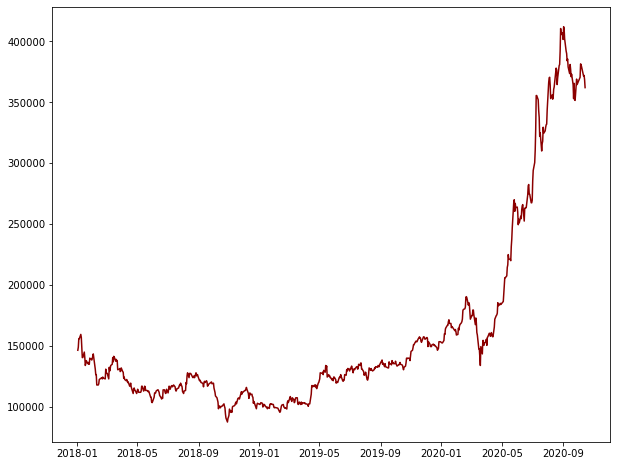

In [39]:
plt.figure(figsize=(10,8))
plt.plot(df.index, df.Close, c='darkred')